#Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de comprendre les vidéos suivantes :

1.   [BINV3100 2 IA 1 Introduction au réseau de neurones et deep-learning](https://www.youtube.com/watch?v=CNJ942E7UyQ)
2.   [BINV3100 2 IA 2 Réseau de neurones](https://www.youtube.com/watch?v=FIfByp7qc90)
3.   [BINV3100 2 IA 3 Régression sur PyTorch](https://www.youtube.com/watch?v=Fnjj2QBpUM4)
4.   [BINV3100 2 IA 3 Classification sur PyTorch](https://www.youtube.com/watch?v=cOMagXizAtk)
5.   [BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

#Partie 1: Exercices relatifs aux Vidéos

[BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

**Nous utilisons pas encore le GPU, il ne faut pas changer le runtime**

Merci de commenter un maximum votre code.

Objectifs :

Exercice 1 (sur 4):
- Layer ok et bons paramètres
- Bonne forward pass / calcul de loss / retropropagation du gradient
- Bonne accuracy sur le test (100% escompté)
- Divers (bonne gestion de type, bonne création de batch, bon arrêt d'entrainement, tracking de la training loss)


Exercice 2 (sur 2) :
- Bonne modification du réseau
- Bonne accuracy sur le test (100% escompté)

Exercice 3 (sur 2):
- Bonne déclaration de la classe Network
- Bonne modification de optimizer et de la forward pass

Exercice 4 (sur 2):
- Bonne déclaration de la classe Dataset
- Bon calcul de l'accuracy

Bonus (2 points):
- Exercice 4: plot de l'évolution de la training loss par epoch
- Un truc cool qui va au dela des énnoncés (merci de le dire explicitement dans cette cellule pour que je le trouve facilement)



## **Exercice 1 : Classification linéaire**

In [169]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

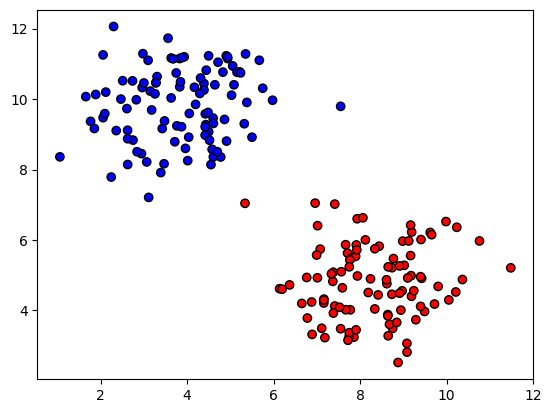

In [170]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')

In [171]:
# Procédure pour générer un batch
def batch(X,y,batch_size):
  #X,y sont les features et target dont on veut prendre un batch de taille batch size
  #Attention !! X et y doivent être des array numpy et batch, batch y en seront aussi
  batch_x = []
  batch_y = []
  indices = []
  while (len(indices)<batch_size) :
    random_index = randrange(len(X))
    if (not random_index in indices):
      batch_x.append(np.array(X[random_index]))
      batch_y.append(np.array(y[random_index]))
      indices.append(random_index)
  return batch_x,batch_y

In [172]:
import torch
import torch.nn as nn
import numpy as np
from random import randrange
import torch.optim as optim

## Créez les layers ici
layer1 = nn.Linear(2, 3)
layer2 = nn.Linear(3, 2)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.1

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters()) + list(layer2.parameters()), lr = learning_rate)

# Split test/train selon https://playground.tensorflow.org/
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Training
while True:
  X_batch, y_batch = batch(X_train, y_train, batch_size = batch_size)

  y_batch = np.array(y_batch)
  X_batch = np.array(X_batch)

  X_batch_tensor = torch.tensor(X_batch, dtype=torch.float32)
  y_batch_tensor = torch.tensor(y_batch, dtype=torch.long)

  optimizer.zero_grad()

  out = layer2(layer1(X_batch_tensor))

  loss = loss_func(out, y_batch_tensor)

  loss.backward()
  optimizer.step()
  print(f"Training Loss: {loss.item()}")
  if loss.item() < 0.1:
        break

# Eval sur test
with torch.no_grad():
    test_inputs = torch.Tensor(X_test)
    test_labels = torch.LongTensor(y_test)

    test_output = layer2(layer1(test_inputs))

    predicted = np.argmax(test_output.numpy(), axis = 1)
    accuracy = np.mean(predicted == test_labels.numpy())

    print(f"Accuracy on Test Data: {accuracy * 100}%")

Training Loss: 0.6544089913368225
Training Loss: 0.5898969173431396
Training Loss: 0.6176874041557312
Training Loss: 0.5018899440765381
Training Loss: 0.4523540139198303
Training Loss: 0.26815012097358704
Training Loss: 0.4716562330722809
Training Loss: 0.34216630458831787
Training Loss: 0.14536716043949127
Training Loss: 0.19392769038677216
Training Loss: 0.09617818146944046
Accuracy on Test Data: 99.0%


## **Exercice 2 : Classification non-linéaire**

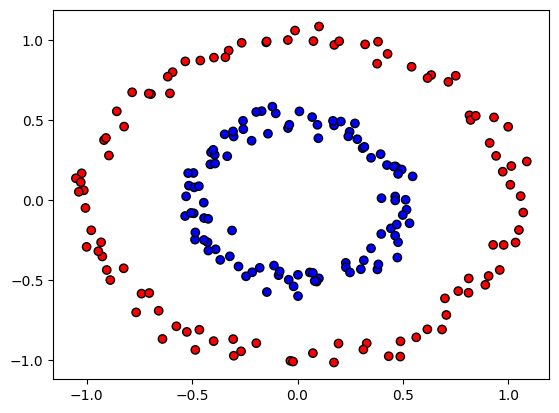

In [173]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()


In [178]:
# Modifiez votre reseau (la couche intermédiaire) pour obtenir 100% sur ce dataset

## Créez les layers ici
layer1 = nn.Linear(2, 3)
tanh = nn.Tanh()
layer2 = nn.Linear(3, 2)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.1

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr = learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Training
while True:
  X_batch, y_batch = batch(X_train, y_train, batch_size = batch_size)

  y_batch = np.array(y_batch)
  X_batch = np.array(X_batch)

  X_batch_tensor = torch.tensor(X_batch, dtype=torch.float32)
  y_batch_tensor = torch.tensor(y_batch, dtype=torch.long)

  optimizer.zero_grad()

  out = layer2(tanh(layer1(X_batch_tensor)))

  loss = loss_func(out, y_batch_tensor)

  loss.backward()
  optimizer.step()
  print(f"Training Loss: {loss.item()}")
  if loss.item() < 0.1:
        break

# Eval sur test
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.long)

    test_output = layer2(tanh(layer1(test_inputs)))

    predicted = np.argmax(test_output.numpy(), axis = 1)
    accuracy = np.mean(predicted == test_labels.numpy())

    print(f"Accuracy on Test Data: {accuracy * 100}%")

Training Loss: 0.704660177230835
Training Loss: 0.68018639087677
Training Loss: 0.7616987824440002
Training Loss: 0.6966195702552795
Training Loss: 0.6628320217132568
Training Loss: 0.7050206065177917
Training Loss: 0.7035135626792908
Training Loss: 0.7280953526496887
Training Loss: 0.6901119947433472
Training Loss: 0.6823526620864868
Training Loss: 0.7326990365982056
Training Loss: 0.6836972236633301
Training Loss: 0.6519570350646973
Training Loss: 0.7262388467788696
Training Loss: 0.6759316325187683
Training Loss: 0.6800246238708496
Training Loss: 0.6385734677314758
Training Loss: 0.6932806968688965
Training Loss: 0.7184414267539978
Training Loss: 0.6366139650344849
Training Loss: 0.6965634226799011
Training Loss: 0.5746013522148132
Training Loss: 0.6602312326431274
Training Loss: 0.6922243237495422
Training Loss: 0.6485801935195923
Training Loss: 0.7630088329315186
Training Loss: 0.631030797958374
Training Loss: 0.6782124042510986
Training Loss: 0.7004178166389465
Training Loss: 0.7

## **Exercice 3 : Network class**

Vous allez recoder l'exercice 2 en ajoutant deux modifications: <br/>
1)
Pour l'instant, on traite nos couches séparément, et non comme un "block" unifié. Par exemple, il faut donner les parametres de chaque couche a l'optimizer (par exemple : `optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate`)

Allez sur ce lien et regardez comment définir une classe pour votre réseau (https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html). Utilisez la et modifiez votre ligne de l'optimiseur ainsi que la gestion de votre forward pass.

2)
Imaginez qu'on ait 1000 couches, ce n'est pas pratique des les appeler une par une lors de la forward pass. Utilisez la fonction suivante pour palier au problème :
https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html

In [180]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Classe Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Tanh()
        self.fc3 = nn.Linear(3, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Copiez collez votre solution en modifiant l'otim.SGD et la forward pass

## Créez les layers ici
model = Net()

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.1

# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# Training
while True:
  X_batch, y_batch = batch(X_train, y_train, batch_size = batch_size)

  y_batch = np.array(y_batch)
  X_batch = np.array(X_batch)

  X_batch_tensor = torch.tensor(X_batch, dtype=torch.float32)
  y_batch_tensor = torch.tensor(y_batch, dtype=torch.long)

  optimizer.zero_grad()

  y_pred = model(X_batch_tensor)
  loss = loss_func(y_pred, y_batch_tensor)

  loss.backward()
  optimizer.step()
  print(f"Training Loss: {loss.item()}")
  if loss.item() < 0.1:
        break

# Eval sur test
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.long)

    test_output = model(test_inputs)

    predicted = np.argmax(test_output.numpy(), axis = 1)
    accuracy = np.mean(predicted == test_labels.numpy())

    print(f"Accuracy on Test Data: {accuracy * 100}%")

Training Loss: 0.8814164996147156
Training Loss: 0.5630083680152893
Training Loss: 0.7347114682197571
Training Loss: 0.6768612265586853
Training Loss: 0.7999709844589233
Training Loss: 0.673324704170227
Training Loss: 0.6215248107910156
Training Loss: 0.7251855134963989
Training Loss: 0.7602086663246155
Training Loss: 0.8131636381149292
Training Loss: 0.7131611704826355
Training Loss: 0.7103308439254761
Training Loss: 0.6438497304916382
Training Loss: 0.747871994972229
Training Loss: 0.6469854712486267
Training Loss: 0.7046647071838379
Training Loss: 0.7064049243927002
Training Loss: 0.6152964234352112
Training Loss: 0.7090757489204407
Training Loss: 0.7740894556045532
Training Loss: 0.7290576100349426
Training Loss: 0.6537407636642456
Training Loss: 0.6444079279899597
Training Loss: 0.7002242803573608
Training Loss: 0.6435907483100891
Training Loss: 0.6797136068344116
Training Loss: 0.7041635513305664
Training Loss: 0.6117070317268372
Training Loss: 0.7050996422767639
Training Loss: 0

## **Exercice 4 : Dataloader**

En général, il est compliqué de créer soi même ses batchs, surtout si le dataset devient complexe. Nous allons utiliser un dataloader de pytorch, qui lui même crée les batch. Lisez **seulement la section "dataset" de cette ressource** :https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel#dataset et créer votre classe dataset. Voici une esquisse de code pour vous aider :

In [ ]:
import torch

X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, y):
        # a completer

  def __len__(self):
        'Denotes the total number of samples'
        return # a completer

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select one sample at position index
        # Return in type : np.array

        # a compléter
        return x, y


X_train, X_test, y_train, y_test = # splitting a faire
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

training_generator = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_generator = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

print('Train set length', len(train_dataset))
print('Test set length', len(test_dataset))

net = Network()

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
# Déclarez la loss et l'optimisation (SGD)



for i in range(num_epochs):
  for j, sample in enumerate(training_generator):
    x, y = sample # Generator automatically transform it to tensor
    # A compléter


accuracy = []
for j, sample in enumerate(test_generator):
  x, y = sample # Generator automatically transform it to tensor
  # A compléter

print('\n Accuracy is ' , # A compléter)
